In [1]:
import pandas as pd

In [146]:
df=pd.read_csv("C:/Users/Vedit/Downloads/archive (1)/Bank Customer Churn Prediction.csv")

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [150]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [152]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [154]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [164]:
df=pd.get_dummies(df,columns=['country'],drop_first=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  country_Germany   10000 non-null  bool   
 12  country_Spain     10000 non-null  bool   
dtypes: bool(2), float64(2), int64(9)
memory usage: 879.0 KB


In [168]:
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True


In [170]:
from sklearn.model_selection import train_test_split

In [172]:
from sklearn.preprocessing import StandardScaler

In [176]:
X=df.drop('churn',axis=1)

In [178]:
Y=df['churn']

In [180]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

In [182]:
scaler=StandardScaler()

In [184]:
X_train_scaled=scaler.fit_transform(X_train)

In [186]:
X_test_scaled=scaler.transform(X_test)

In [188]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X.columns)

In [190]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [192]:
print("Training and testing data prepared.")
print("X_train shape:", X_train_scaled.shape)
X_train_scaled.info()
X_test_scaled.info()

Training and testing data prepared.
X_train shape: (7500, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7500 non-null   float64
 1   credit_score      7500 non-null   float64
 2   gender            7500 non-null   float64
 3   age               7500 non-null   float64
 4   tenure            7500 non-null   float64
 5   balance           7500 non-null   float64
 6   products_number   7500 non-null   float64
 7   credit_card       7500 non-null   float64
 8   active_member     7500 non-null   float64
 9   estimated_salary  7500 non-null   float64
 10  country_Germany   7500 non-null   float64
 11  country_Spain     7500 non-null   float64
dtypes: float64(12)
memory usage: 703.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, Y_train)
lr_preds = lr_model.predict(X_test_scaled)

print("\n--- Logistic Regression ---")
print(confusion_matrix(Y_test, lr_preds))
print(classification_report(Y_test, lr_preds))

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, Y_train)
rf_preds = rf_model.predict(X_test_scaled)

print("\n--- Random Forest ---")
print(confusion_matrix(Y_test, rf_preds))
print(classification_report(Y_test, rf_preds))

# 3. SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, Y_train)
svm_preds = svm_model.predict(X_test_scaled)

print("\n--- Support Vector Machine (SVM) ---")
print(confusion_matrix(Y_test, svm_preds))
print(classification_report(Y_test, svm_preds))



--- Logistic Regression ---
[[1924   67]
 [ 410   99]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.60      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500


--- Random Forest ---
[[1924   67]
 [ 270  239]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.78      0.47      0.59       509

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500


--- Support Vector Machine (SVM) ---
[[1957   34]
 [ 306  203]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1991
           1       0.86      0.40      0.54       509

    accurac

In [197]:
print("Total rows in full dataset:", df.shape[0])
print("Class distribution:\n", df['churn'].value_counts())


Total rows in full dataset: 10000
Class distribution:
 churn
0    7963
1    2037
Name: count, dtype: int64


In [199]:
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]


In [209]:
t_test_results = {}
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
for col in num_cols:
    stat, p = ttest_ind(churned[col], not_churned[col], equal_var=False)
    t_test_results[col] = {
        't-statistic': round(stat, 3),
        'p-value': round(p, 5),
        'Significant (p < 0.05)': p < 0.05
    }


In [211]:
t_test_df = pd.DataFrame(t_test_results).T
print("T-Test Results:")
print(t_test_df)


T-Test Results:
                 t-statistic  p-value Significant (p < 0.05)
credit_score          -2.635  0.00846                   True
age                   30.419      0.0                   True
tenure                -1.384  0.16636                  False
balance               12.471      0.0                   True
estimated_salary       1.203  0.22892                  False


In [223]:
from scipy.stats import chi2_contingency

categorical_cols = ['gender', 'active_member', 'credit_card', 'country_Spain','country_Germany']
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['churn'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col} vs churn: Chi2 = {chi2:.2f}, p-value = {p:.5f}, Significant: {p < 0.05}")


gender vs churn: Chi2 = 112.92, p-value = 0.00000, Significant: True
active_member vs churn: Chi2 = 242.99, p-value = 0.00000, Significant: True
credit_card vs churn: Chi2 = 0.47, p-value = 0.49237, Significant: False
country_Spain vs churn: Chi2 = 27.44, p-value = 0.00000, Significant: True
country_Germany vs churn: Chi2 = 299.99, p-value = 0.00000, Significant: True


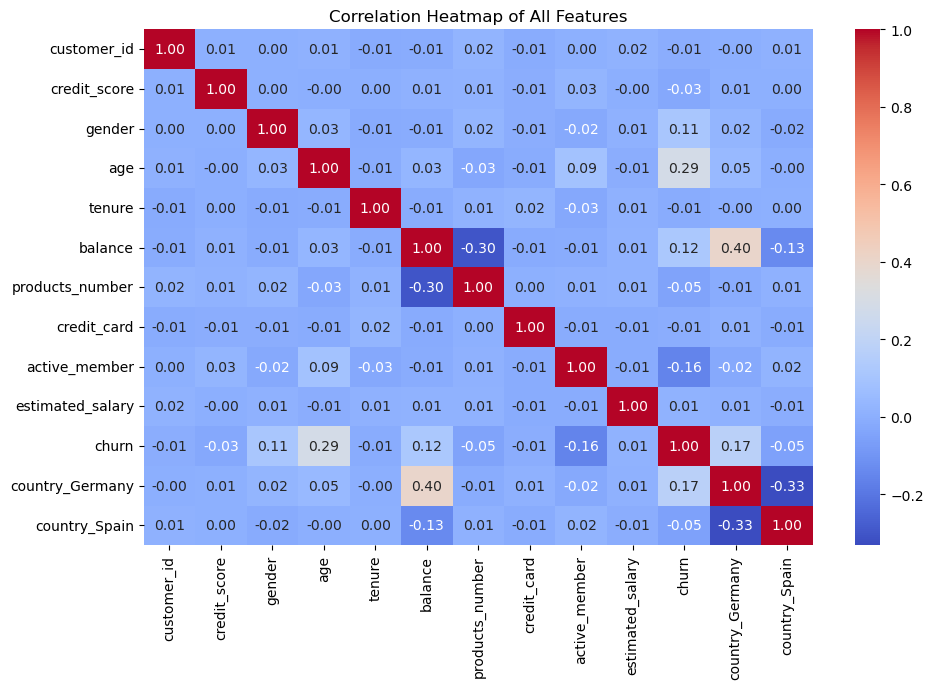

In [225]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()

Random Forest Feature Importances:

             Feature  Importance
3                age    0.214473
6    products_number    0.123025
5            balance    0.120912
9   estimated_salary    0.120810
0        customer_id    0.120321
1       credit_score    0.119605
4             tenure    0.069175
8      active_member    0.037245
10   country_Germany    0.028407
7        credit_card    0.017006
2             gender    0.016249
11     country_Spain    0.012772


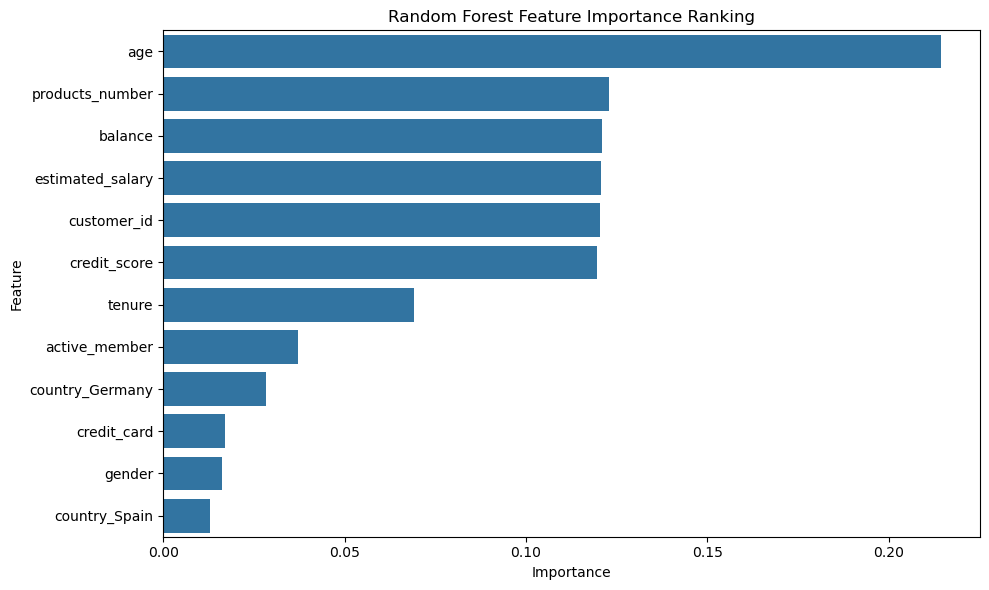

In [227]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train_scaled.columns  # Replace with X_train.columns if using unscaled
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print ranked feature list
print("Random Forest Feature Importances:\n")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance Ranking')
plt.tight_layout()
plt.show()
